In [ ]:
pip install --upgrade google-cloud-storage

     |████████████████████████████████| 106 kB 5.1 MB/s 
     |████████████████████████████████| 95 kB 5.7 MB/s 
     |████████████████████████████████| 75 kB 5.2 MB/s 
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.26.3
    Uninstalling google-api-core-1.26.3:
      Successfully uninstalled google-api-core-1.26.3
  Attempting uninstall: google-resumable-media
    Found existing installation: google-resumable-media 0.4.1
    Uninstalling google-resumable-media-0.4.1:
      Successfully uninstalled google-resumable-media-0.4.1
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 1.0.3
    Uninstalling google-cloud-core-1.0.3:
      Successfully uninstalled google-cloud-core-1.0.3
  Attempting uninstall: google-cloud-storage
    Found existing installation: google-cloud-storage 1.18.1
    Uninstalling google-cloud-storage-1.18.1:
      Successfully uninstalled google-cloud-storage-1.18.1
ERROR: pip's depe

In [ ]:
import os
from argparse import Namespace
from collections import Counter
import json
import re
import string
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm_notebook

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install allennlp

     |████████████████████████████████| 738 kB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 23.4 MB/s 
     |████████████████████████████████| 12.1 MB 55.9 MB/s 
     |████████████████████████████████| 1.7 MB 45.5 MB/s 
     |████████████████████████████████| 61 kB 574 kB/s 
     |████████████████████████████████| 3.1 MB 21.5 MB/s 
     |████████████████████████████████| 259 kB 75.4 MB/s 
     |████████████████████████████████| 298 kB 62.4 MB/s 
     |████████████████████████████████| 124 kB 77.4 MB/s 
     |████████████████████████████████| 190 kB 66.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 167 kB 60.3 MB/s 
     |████████████████████████████████| 59 kB 8.2 MB/s 
     |████████████████████████████████| 131 kB 67.1 MB/s 
     |█████████████████

In [ ]:
from allennlp.modules.elmo import Elmo, batch_to_ids

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


In [ ]:
!unzip -q "/content/gdrive/MyDrive/final_cit_map_function.zip" 

In [ ]:
!unzip -q "/content/gdrive/MyDrive/archive (2).zip"

In [ ]:
citation = pd.DataFrame(columns=['Text_Tokens','Cit_func','citseg_id'])

In [ ]:
import os
paths=[]
d = "/content/per_func_map_organised_small"
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        paths.append(full_path)

In [ ]:
for i in range(len(paths)):
  path = paths[i]
  print(path)
  f=open(path)
  data=json.load(f)
  for i in data.values():
    citation_contexts=i['citation_contexts']
    for j in range(len(citation_contexts)):
      a=[]
      tokens=citation_contexts[j]['citance']['tokens_pp']
      for cit_refs in range(len(citation_contexts[j]['cit_refs'])):
         citseg_id=citation_contexts[j]['cit_refs'][cit_refs]['citseg_id']
         if citseg_id not in  a:
            a.append(citseg_id)
            c=citation_contexts[j]['cit_refs'][cit_refs]['citseg_id']
            f=citation_contexts[j]['cit_refs'][cit_refs]['function_agreed']
            citation = citation.append({'Text_Tokens':tokens, 'Cit_func':f,'citseg_id':c},ignore_index=True)

/content/per_func_map_organised_small/Weak.per_func.map_organised_small.json
/content/per_func_map_organised_small/PMot.per_func.map_organised_small.json
/content/per_func_map_organised_small/PSim.per_func.map_organised_small.json
/content/per_func_map_organised_small/PSup.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCo-.per_func.map_organised_small.json
/content/per_func_map_organised_small/Neut.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCoR0.per_func.map_organised_small.json
/content/per_func_map_organised_small/PUse.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCoXY.per_func.map_organised_small.json
/content/per_func_map_organised_small/PBas.per_func.map_organised_small.json
/content/per_func_map_organised_small/PModi.per_func.map_organised_small.json
/content/per_func_map_organised_small/CoCoGM.per_func.map_organised_small.json
/content/per_func_map_organised_small/Future.per_func.map_organised_

In [ ]:
citation

Text_Tokens  ... citseg_id
0                                                                                                                                                                                                 [Recent, work, has, shown, how, to, define, probability, distributions, over, the, parses, of, UBGs, (, CITSEG, ), and, efficiently, estimate, and, use, conditional, probabilities, for, parsing, (, CITSEG, ), .]  ...        15
1                                                                                                                                                                                                 [Recent, work, has, shown, how, to, define, probability, distributions, over, the, parses, of, UBGs, (, CITSEG, ), and, efficiently, estimate, and, use, conditional, probabilities, for, parsing, (, CITSEG, ), .]  ...        27
2                                                                                                                                        [Though, several, studies, with, similar, objectives, have, been, reported, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, they, require, that, sample, corpora, be, correctly, analyzed, or, tagged, in, advance, .]  ...        10
3                                                                                                                                        [Though, several, studies, with, similar, objectives, have, been, reported, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, they, require, that, sample, corpora, be, correctly, analyzed, or, tagged, in, advance, .]  ...        14
4                                                                                                                                        [Though, several, studies, with, similar, objectives, have, been, reported, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, they, require, that, sample, corpora, be, correctly, analyzed, or, tagged, in, advance, .]  ...        18
5                                                                                                                                        [Though, several, studies, with, similar, objectives, have, been, reported, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, they, require, that, sample, corpora, be, correctly, analyzed, or, tagged, in, advance, .]  ...        22
6                                                                                                                                        [Though, several, studies, with, similar, objectives, have, been, reported, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, they, require, that, sample, corpora, be, correctly, analyzed, or, tagged, in, advance, .]  ...        26
7                                                                                                                                        [Though, several, studies, with, similar, objectives, have, been, reported, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, [, CITSEG, ], ,, they, require, that, sample, corpora, be, correctly, analyzed, or, tagged, in, advance, .]  ...        30
8                                                                                                                                                                                                                      [Major, works, done, to, create, English, POS, taggers, (, henceforth, ,, ", taggers, ", ), ,, for, example, ,, include, (, CITSEG, ), ,, (, CITSEG, ), ,, (, CITSEG, ), and, (, CITSEG, ), .]  ...        21
9                                                                                                                                                                                       

In [ ]:
citation.dtypes

Text_Tokens    object
Cit_func       object
citseg_id      object
dtype: object

In [ ]:
#split the subset by rating to create new train, val and test splits
import collections
by_rating = collections.defaultdict(list)
for _,row in citation.iterrows():
  by_rating[row.Cit_func].append(row.to_dict())

In [ ]:
#create split data
seed =1021
final_list = []
np.random.seed(seed)
train_proportion = 0.8
val_proportion = 0.2
#test_proportion = 0.05

for _, item_list in sorted(by_rating.items()):
  np.random.shuffle(item_list)

  n_total = len(item_list)
  n_train = int(train_proportion * n_total)
  n_val = int(val_proportion * n_total)
  #n_test = int(test_proportion * n_total)


  #give data points  split attribute

  for item in item_list[:n_train]:
    item['split'] = 'train'

  #for item in item_list[n_train:n_train+n_val]:
   # item['split'] = 'val'

  for item in item_list[n_train:n_train+n_val]:
    item['split'] = 'val'

  #for item in item_list[n_train+n_val:n_train+n_val+n_test]:
   # item['split'] = 'test'


  #Add to final list

  final_list.extend(item_list)


final_citation = pd.DataFrame(final_list)

In [ ]:
final_citation.isna().any()

Text_Tokens    False
Cit_func       False
citseg_id      False
split           True
dtype: bool

In [ ]:
final_citation.isnull().sum()

Text_Tokens     0
Cit_func        0
citseg_id       0
split          10
dtype: int64

In [ ]:
final_citation=final_citation.dropna()

In [ ]:
final_citation

Text_Tokens  ...  split
0                                                                                                                                                                                                                                               [Table, 2, compares, the, performance, of, our, system, on, the, setup, of, Cohen, and, CITSEG, to, the, best, results, reported, by, them, for, the, same, tasks, .]  ...  train
1                                                                                                                                                 [Our, experimental, results, show, that, the, subjectivity, classifier, performs, well, (, 77, %, recall, with, 81, %, precision, ), and, that, the, learned, nouns, improve, upon, previous, state, -, of, -, the, -, art, subjectivity, results, (, CITSEG, ), .]  ...  train
2                                                                                                                     [Regardless, of, whether, it, takes, the, form, of, dictionaries, (, CITSEG, ), ,, thesauri, (, CITSEG, ), ,, bilingual, corpora, (, CITSEG, ), ,, or, hand, -, labeled, training, sets, (, CITSEG, ), ,, providing, information, for, sense, definitions, can, be, a, considerable, burden, .]  ...  train
3     [Morphological, segmentation, decisions, in, our, model, are, delegated, to, a, lexeme, -, based, PCFG, and, we, show, that, using, a, simple, treebank, grammar, ,, a, data-driven, lexicon, ,, and, a, linguistically, motivated, unknown-, tokens, handling, our, model, outperforms, (, CITSEG, ), and, (, CITSEG, ), on, the, joint, task, and, achieves, state, -, of, -, the, -, art, results, on, a,...  ...  train
4                                                                                           [Experiments, (, Section, 5, ), show, that, forestbased, extraction, improves, BLEU, score, by, over, 1, point, on, a, state, -, of, -, the, -, art, tree, -, to, -, string, system, (, CITSEG, ), ,, which, is, also, 0.5, points, better, than, (, and, twice, as, fast, as, ), extracting, on, 30, -, best, parses, .]  ...  train
5                                                                                                                                                                                                                                                                         [We, show, that, our, system, compares, favorably, to, the, LexRank, (, CITSEG, ), baseline, in, terms, of, ROUGE, -, 1, and, ROUGE, -, 2.]  ...  train
6                                                                                                                                                                                                                                                              [Our, model, is, thus, a, simplification, of, more, sophisticated, models, which, integrate, PCFGs, with, features, ,, such, as, those, in, CITSEG, .]  ...  train
7                                                                                                                                                                                                     [Unlike, other, work, (, e.g., (, CITSEG, ), ), ,, we, treat, the, word, identities, as, a, further, refinement, of, the, POS, tags, ;, thus, we, build, a, word, classification, tree, for, each, POS, tag, .]  ...  train
8                                                                                                                                                                                                                                                                                [This, can, be, done, by, smoothing, the, observed, frequencies, 7, (, CITSEG, ), or, by, class, -, based, methods, (, CITSEG, ), .]  ...  train
9                                                                                                                                                                                                                     

In [ ]:
print(type(final_citation))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
final_citation.dtypes

Text_Tokens    object
Cit_func       object
citseg_id       int64
split          object
dtype: object

In [ ]:
display(final_citation.Cit_func.value_counts())                   # Inspecting the Number of Ratings.
print(" ")

Neut      1475
PUse       761
CoCoGM     300
PMot       290
PSim       210
Weak       160
CoCoXY     156
PBas       101
PSup       100
CoCoR0     100
Future      85
CoCo-       80
PModi       65
Name: Cit_func, dtype: int64

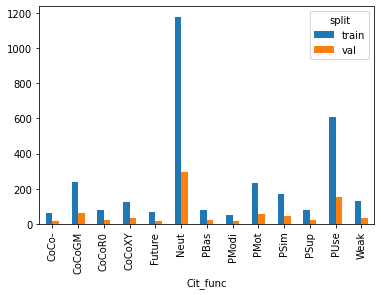

In [ ]:
final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a=final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a.plot(kind='bar')

In [ ]:
final_citation.groupby(['Cit_func','split']).size()

Cit_func  split
CoCo-     train      64
          val        16
CoCoGM    train     240
          val        60
CoCoR0    train      80
          val        20
CoCoXY    train     125
          val        31
Future    train      68
          val        17
Neut      train    1180
          val       295
PBas      train      81
          val        20
PModi     train      52
          val        13
PMot      train     232
          val        58
PSim      train     168
          val        42
PSup      train      80
          val        20
PUse      train     609
          val       152
Weak      train     128
          val        32
dtype: int64

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "CoCoGM" & split == "train"').sample(n=50).index,inplace=True)

In [ ]:
final_citation.drop(final_citation.query('Cit_func == "Neut" & split == "train"').sample(n=400).index,inplace=True)

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "PMot" & split == "train"').sample(n=50).index,inplace=True)

In [ ]:
final_citation.drop(final_citation.query('Cit_func == "PUse" & split == "train"').sample(n=200).index,inplace=True)

In [ ]:
# final_citation.drop(final_citation.query('Cit_func == "Neut" & split == "val"').sample(n=100).index,inplace=True)

In [ ]:
final_citation.groupby(['Cit_func','split']).size()

Cit_func  split
CoCo-     train     64
          val       16
CoCoGM    train    240
          val       60
CoCoR0    train     80
          val       20
CoCoXY    train    125
          val       31
Future    train     68
          val       17
Neut      train    780
          val      295
PBas      train     81
          val       20
PModi     train     52
          val       13
PMot      train    232
          val       58
PSim      train    168
          val       42
PSup      train     80
          val       20
PUse      train    409
          val      152
Weak      train    128
          val       32
dtype: int64

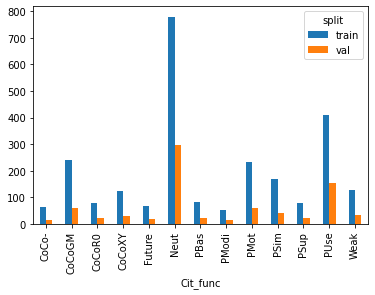

In [ ]:
final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a=final_citation.groupby(['Cit_func','split']).size().unstack(level=1)  
a.plot(kind='bar')

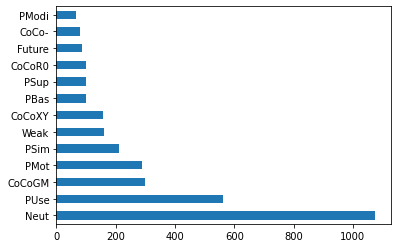

In [ ]:
 final_citation.Cit_func.value_counts().plot(kind='barh')

In [ ]:
final_citation = final_citation.sample(frac=1).reset_index(drop=True)

In [ ]:
class Vocabulary(object):
    """Class to process text and extract vocabulary for mapping"""

    def __init__(self, token_to_idx=None):
        """
        Args:
            token_to_idx (dict): a pre-existing map of tokens to indices
        """

        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}
        
    def to_serializable(self):
        """ returns a dictionary that can be serialized """
        return {'token_to_idx': self._token_to_idx}

    @classmethod
    def from_serializable(cls, contents):
        """ instantiates the Vocabulary from a serialized dictionary """
        return cls(**contents)

    def add_token(self, token):
        """Update mapping dicts based on the token.

        Args:
            token (str): the item to add into the Vocabulary
        Returns:
            index (int): the integer corresponding to the token
        """
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index#,token
            
    def add_many(self, tokens):
        """Add a list of tokens into the Vocabulary
        
        Args:
            tokens (list): a list of string tokens
        Returns:
            indices (list): a list of indices corresponding to the tokens
        """
        return [self.add_token(token) for token in tokens]

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        """
        return self._token_to_idx[token]

    def lookup_index(self, index):
        """Return the token associated with the index
        
        Args: 
            index (int): the index to look up
        Returns:
            token (str): the token corresponding to the index
        Raises:
            KeyError: if the index is not in the Vocabulary
        """
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)

In [ ]:
class SequenceVocabulary(Vocabulary):
    def __init__(self, token_to_idx=None, unk_token="<UNK>",
                 mask_token="<MASK>", begin_seq_token="<BEGIN>",
                 end_seq_token="<END>"):

        super(SequenceVocabulary, self).__init__(token_to_idx)

        self._mask_token = mask_token
        self._unk_token = unk_token
        self._begin_seq_token = begin_seq_token
        self._end_seq_token = end_seq_token

        self.mask_index = self.add_token(self._mask_token)
        self.unk_index = self.add_token(self._unk_token)
        self.begin_seq_index = self.add_token(self._begin_seq_token)
        self.end_seq_index = self.add_token(self._end_seq_token)

    def to_serializable(self):
        contents = super(SequenceVocabulary, self).to_serializable()
        contents.update({'unk_token': self._unk_token,
                         'mask_token': self._mask_token,
                         'begin_seq_token': self._begin_seq_token,
                         'end_seq_token': self._end_seq_token})
        return contents

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
          or the UNK index if token isn't present.
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        Notes:
            `unk_index` needs to be >=0 (having been added into the Vocabulary) 
              for the UNK functionality 
        """
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

In [ ]:
class CitationVectorizer(object):
    """ The Vectorizer which coordinates the Vocabularies and puts them to use"""    
    def __init__(self, title_vocab, category_vocab):
        self.title_vocab = title_vocab
        self.category_vocab = category_vocab

    def vectorize(self, title, vector_length=-1):
        """
        Args:
            title (str): the string of words separated by a space
            vector_length (int): an argument for forcing the length of index vector
        Returns:
            the vetorized title (numpy.array)
        """
        indices = [self.title_vocab.begin_seq_index]
        indices.extend(self.title_vocab.lookup_token(token) 
                       for token in title)
        indices.append(self.title_vocab.end_seq_index)

        if vector_length < 0:
            vector_length = len(indices)

        out_vector = np.zeros(vector_length, dtype=np.int64)
        out_vector[:len(indices)] = indices
        out_vector[len(indices):] = self.title_vocab.mask_index
        return out_vector

    @classmethod
    def from_dataframe(cls, citation_df, cutoff=0):
        """Instantiate the vectorizer from the dataset dataframe
        
        Args:
            citation_df (pandas.DataFrame): the target dataset
            cutoff (int): frequency threshold for including in Vocabulary 
        Returns:
            an instance of the CitationVectorizer
        """
        category_vocab = Vocabulary()     
        for category in sorted(set(citation_df.Cit_func)):
            category_vocab.add_token(category)
            #a=category_vocab.add_token(category)
            #print(a)
        word_counts = Counter()
        for title in citation_df.Text_Tokens:
          # print("title is %s"%title)
          for token in title:
              # print("token is %s"%token)
              #if token not in string.punctuation:
              word_counts[token] += 1
        
        title_vocab = SequenceVocabulary()
        for word, word_count in word_counts.items():
            # print("word:word_count are %s:%d"%(word,word_count))
            if word_count >= cutoff:
                title_vocab.add_token(word)
        return cls(title_vocab, category_vocab)

    @classmethod
    def from_serializable(cls, contents):
        
        title_vocab = \
            SequenceVocabulary.from_serializable(contents['title_vocab'])
        category_vocab =  \
            Vocabulary.from_serializable(contents['category_vocab'])

        return cls(title_vocab=title_vocab, category_vocab=category_vocab)

    def to_serializable(self):
        return {'title_vocab': self.title_vocab.to_serializable(),
                'category_vocab': self.category_vocab.to_serializable()}

In [ ]:
class CitationDataset(Dataset):
    def __init__(self, citation_df, vectorizer):
        """
        Args:
            citation_df (pandas.DataFrame): the dataset
            vectorizer (CitationVectorizer): vectorizer instatiated from dataset
        """
        self.citation_df = citation_df
        self._vectorizer = vectorizer

        # +1 if only using begin_seq, +2 if using both begin and end seq tokens
        measure_len = lambda context: len(context)
        self._max_seq_length = max(map(measure_len, citation_df.Text_Tokens)) + 2
        

        self.train_df = self.citation_df[self.citation_df.split=='train']
        self.train_size = len(self.train_df)

        self.val_df = self.citation_df[self.citation_df.split=='val']
        self.validation_size = len(self.val_df)

        self.test_df = self.citation_df[self.citation_df.split=='test']
        self.test_size = len(self.test_df)

        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val': (self.val_df, self.validation_size),
                             'test': (self.test_df, self.test_size)}

        self.set_split('train')

        # Class weights
        class_counts = citation_df.Cit_func.value_counts().to_dict()
        def sort_key(item):
            return self._vectorizer.category_vocab.lookup_token(item[0])
        sorted_counts = sorted(class_counts.items(), key=sort_key)
        frequencies = [count for _, count in sorted_counts]
        self.class_weights = 1.0 / torch.tensor(frequencies, dtype=torch.float32)

        
        
    @classmethod
    def load_dataset_and_make_vectorizer(cls, citation_csv):
        """Load dataset and make a new vectorizer from scratch
        
        Args:
            citation_csv (str): location of the dataset
        Returns:
            an instance of citationDataset
        """
        citation_df = citation_csv
        train_citation_df = citation_df[citation_df.split=='train']
        return cls(citation_df, CitationVectorizer.from_dataframe(train_citation_df))

    @classmethod
    def load_dataset_and_load_vectorizer(cls, citation_csv, vectorizer_filepath):
        """Load dataset and the corresponding vectorizer. 
        Used in the case in the vectorizer has been cached for re-use
        
        Args:
            surname_csv (str): location of the dataset
            vectorizer_filepath (str): location of the saved vectorizer
        Returns:
            an instance of SurnameDataset
        """
        
        citation_df = citation_csv
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(citation_csv, vectorizer)

    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        """a static method for loading the vectorizer from file
        
        Args:
            vectorizer_filepath (str): the location of the serialized vectorizer
        Returns:
            an instance of functionVectorizer
        """
        with open(vectorizer_filepath) as fp:
            return NameVectorizer.from_serializable(json.load(fp))

    def save_vectorizer(self, vectorizer_filepath):
        """saves the vectorizer to disk using json
        
        Args:
            vectorizer_filepath (str): the location to save the vectorizer
        """
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)

    def get_vectorizer(self):
        """ returns the vectorizer """
        return self._vectorizer

    def set_split(self, split="train"):
        """ selects the splits in the dataset using a column in the dataframe """
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """the primary entry point method for PyTorch datasets
        
        Args:
            index (int): the index to the data point 
        Returns:
            a dictionary holding the data point's features (x_data) and label (y_target)
        """
        
        
        row = self._target_df.iloc[index]
        citseg= row.citseg_id

        # title_vector = \
        #     self._vectorizer.vectorize(row.Text_Tokens, self._max_seq_length)

        # category_index = row.Cit_func
        #print(category_index)
        category_index = self._vectorizer.category_vocab.lookup_token(row.Cit_func)
        # print("title_vector")
        title_vector=row.Text_Tokens
        # print(title_vector)
        
        # return {'x_data': title_vector,
        #         'y_target': category_index,
        #         'citseg_id':citseg
        #         }

        return title_vector, category_index , citseg

    def get_num_batches(self, batch_size):
        """Given a batch size, return the number of batches in the dataset
        
        Args:
            batch_size (int)
        Returns:
            number of batches in the dataset
        """
        return len(self) // batch_size

def my_collate(batch):
   print(batch)
   return batch

def batchify(data, bsz, shuffle=False,device="cpu"):
    if shuffle:
        random.shuffle(data)
    sents,tags,citseg = zip(*data)
    nbatch = (len(sents)+bsz-1) // bsz
    # downsample biggest class
    # sents, tags = balance_tags(sents, tags)

    for i in range(nbatch):

        batch = sents[i*bsz:(i+1)*bsz]
        batch_tags = tags[i*bsz:(i+1)*bsz]
        citseg_id  = citseg[i*bsz:(i+1)*bsz]
        batch = batch_to_ids(batch)
        batch_tags = torch.tensor(batch_tags).long()
        citseg_id = torch.tensor(citseg_id).long()
        # lengths = [torch.tensor(l).long() for l in lengths]
        # print("batch")
        # print(batch)
        # print("batch_tags")
        # print(device)
        # print(batch_tags)
        batch=batch.to(device)
        batch_tags=batch_tags.to(device)
        citseg_id = citseg_id.to(device)
        # yield (batch, batch_tags, lengths)
        yield (batch, batch_tags, citseg_id)

In [ ]:
# bilstm output of citseg
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class CitationClassifier1(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier1, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print("x.shape")
        # print(x.shape)
        packed_output, (hidden, cell) = self.lstm(x)
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        out = self.fc1(packed_output)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
# h1 + hn + citseg
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class CitationClassifier3(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier3, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*6, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print("x.shape")
        # print(x.shape)
        s=sentences.shape[1]
        packed_output, (hidden, cell) = self.lstm(x)
        h_1 = packed_output[torch.arange(packed_output.size(0)),0]
        h_n = packed_output[torch.arange(packed_output.size(0)),s-1]
        avg_pool = torch.mean(packed_output, 1)
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        h_1h_n=torch.cat([h_1,packed_output,h_n],dim=1)
        out = self.fc1(h_1h_n)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
# attention
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        # print("weighted_input.shape")
        # print(weighted_input.shape)
        return (weighted_input)

class CitationClassifier(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        # self.attention_layer = Attention(hidden_dim*2)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print(elmo_out['elmo_representations'][0].shape)
        # print("x.shape")
        # print(x.shape)
        
        packed_output, (hidden, cell) = self.lstm(x)
        l=packed_output.shape[1]
        l=torch.tensor(l)
        l=l.cuda()
        h=torch.tensor(64)
        h=h.cuda()
        self.attention_layer = Attention(h,l).cuda()
        packed_output = self.attention_layer(packed_output)
        # print(packed_output.shape)
        packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        out = self.fc1(packed_output)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1


In [ ]:
def make_train_state(args):
    return {'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'learning_rate': args.learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': args.model_state_file}

def update_train_state(args, model, train_state):
    """Handle the training state updates.

    Components:
     - Early Stopping: Prevent overfitting.
     - Model Checkpoint: Model is saved if the model is better

    :param args: main arguments
    :param model: model to train
    :param train_state: a dictionary representing the training state values
    :returns:
        a new train_state
    """

    # Save one model at least
    if train_state['epoch_index'] == 0:
        torch.save(model.state_dict(), train_state['model_filename'])
        train_state['stop_early'] = False

    # Save model if performance improved
    elif train_state['epoch_index'] >= 1:
        loss_tm1, loss_t = train_state['val_loss'][-2:]

        # If loss worsened
        if loss_t >= train_state['early_stopping_best_val']:
            # Update step
            train_state['early_stopping_step'] += 1
        # Loss decreased
        else:
            # Save the best model
            if loss_t < train_state['early_stopping_best_val']:
                torch.save(model.state_dict(), train_state['model_filename'])

            # Reset early stopping step
            train_state['early_stopping_step'] = 0

        # Stop early ?
        train_state['stop_early'] = \
            train_state['early_stopping_step'] >= args.early_stopping_criteria

    return train_state

def compute_accuracy(y_pred, y_target):
    _, y_pred_indices = y_pred.max(dim=1)
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

In [ ]:
def set_seed_everywhere(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)

def handle_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)
        
def load_glove_from_file(glove_filepath):
    """
    Load the GloVe embeddings 
    
    Args:
        glove_filepath (str): path to the glove embeddings file 
    Returns:
        word_to_index (dict), embeddings (numpy.ndarary)
    """

    word_to_index = {}
    embeddings = []
    with open(glove_filepath, "r") as fp:
        for index, line in enumerate(fp):
            line = line.split(" ") # each line: word num1 num2 ...
            word_to_index[line[0]] = index # word = line[0] 
            embedding_i = np.array([float(val) for val in line[1:]])
            embeddings.append(embedding_i)
    return word_to_index, np.stack(embeddings)

def make_embedding_matrix(glove_filepath, words):
    """
    Create embedding matrix for a specific set of words.
    
    Args:
        glove_filepath (str): file path to the glove embeddigns
        words (list): list of words in the dataset
    """
    word_to_idx, glove_embeddings = load_glove_from_file(glove_filepath)
    embedding_size = glove_embeddings.shape[1]
    final_embeddings = np.zeros((len(words), embedding_size))

    for i, word in enumerate(words):
        if word in word_to_idx:
            final_embeddings[i, :] = glove_embeddings[word_to_idx[word]]
        else:
            embedding_i = torch.ones(1, embedding_size)
            torch.nn.init.xavier_uniform_(embedding_i)
            final_embeddings[i, :] = embedding_i
    print(final_embeddings)
    print(final_embeddings.shape)
    return final_embeddings

In [ ]:
from argparse import Namespace

In [ ]:
args = Namespace(
    # Data and Path hyper parameters
    citation_csv=final_citation,
    vectorizer_file="vectorizer.json",
    model_state_file="model.pth",
    save_dir="model_storage/ch5/document_classification",
    # Model hyper parameters
    glove_filepath='/content/glove.6B.300d.txt', 
    use_glove=False,
    embedding_size=300, 
    hidden_dim=32,
    # Training hyper parameter
    seed=1337, 
    learning_rate=0.001, 
    dropout_p=0.1, 
    batch_size=30, 
    num_epochs=30, 
    num_layers=2,
    early_stopping_criteria=5, 
    # Runtime option
    cuda=True, 
    catch_keyboard_interrupt=True, 
    reload_from_files=False,
    expand_filepaths_to_save_dir=True
) 

if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)
    
    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))
    
# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False
    
args.device = torch.device("cuda" if args.cuda else "cpu")
print("Using CUDA: {}".format(args.cuda))

# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Expanded filepaths: 
	model_storage/ch5/document_classification/vectorizer.json
	model_storage/ch5/document_classification/model.pth
Using CUDA: True


In [ ]:
args.use_glove = True

In [ ]:
if args.reload_from_files:
    # training from a checkpoint
    dataset = CitationDataset.load_dataset_and_load_vectorizer(args.citation_csv,
                                                              args.vectorizer_file)
else:
    # create dataset and vectorizer
    dataset = CitationDataset.load_dataset_and_make_vectorizer(args.citation_csv)
    dataset.save_vectorizer(args.vectorizer_file)
vectorizer = dataset.get_vectorizer()
print(len(vectorizer.title_vocab))
# Use GloVe or randomly initialized embeddings
if args.use_glove:
    words = vectorizer.title_vocab._token_to_idx.keys()
    embeddings = make_embedding_matrix(glove_filepath=args.glove_filepath, 
                                       words=words)
    print("Using pre-trained embeddings")
else:
    print("Not using pre-trained embeddings")
    embeddings = None

classifier = CitationClassifier1(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

print(classifier)

7632
[[-0.11907164 -0.00123771  0.03475953 ...  0.10838436 -0.02188396
  -0.09059642]
 [-0.03658002  0.06027976 -0.01801901 ...  0.11394491 -0.03662597
  -0.09734906]
 [-0.07221913 -0.02466366 -0.03699218 ...  0.0299247  -0.07259606
  -0.04028996]
 ...
 [ 0.024889   -0.15851    -0.19032    ... -0.17296    -0.33603
  -0.25569   ]
 [ 0.13996059  0.11822644 -0.09367901 ...  0.09033696 -0.0797292
  -0.09827816]
 [ 0.04125384  0.13328813  0.11181668 ... -0.13325182  0.04659251
   0.03860948]]
(7632, 300)
Using pre-trained embeddings


downloading: 100%|##########| 336/336 [00:00<00:00, 507kiB/s]
downloading: 100%|##########| 357M/357M [00:14<00:00, 25.5MiB/s]


CitationClassifier1(
  (elmo): Elmo(
    (_elmo_lstm): _ElmoBiLm(
      (_token_embedder): _ElmoCharacterEncoder(
        (char_conv_0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
        (char_conv_1): Conv1d(16, 32, kernel_size=(2,), stride=(1,))
        (char_conv_2): Conv1d(16, 64, kernel_size=(3,), stride=(1,))
        (char_conv_3): Conv1d(16, 128, kernel_size=(4,), stride=(1,))
        (char_conv_4): Conv1d(16, 256, kernel_size=(5,), stride=(1,))
        (char_conv_5): Conv1d(16, 512, kernel_size=(6,), stride=(1,))
        (char_conv_6): Conv1d(16, 1024, kernel_size=(7,), stride=(1,))
        (_highways): Highway(
          (_layers): ModuleList(
            (0): Linear(in_features=2048, out_features=4096, bias=True)
            (1): Linear(in_features=2048, out_features=4096, bias=True)
          )
        )
        (_projection): Linear(in_features=2048, out_features=512, bias=True)
      )
      (_elmo_lstm): ElmoLstm(
        (forward_layer_0): LstmCellWithProjection(
   

In [ ]:
embeddings.shape

(7632, 300)

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.547642286007221	 val_acc=6.9625246548323485
Epoch 1	 val_loss=2.520606591151311	 val_acc=10.57199211045365
Epoch 2	 val_loss=2.493698826202979	 val_acc=7.859960552268243
Epoch 3	 val_loss=2.480672689584585	 val_acc=8.116370808678504
Epoch 4	 val_loss=2.467100656949557	 val_acc=10.039447731755423
Epoch 5	 val_loss=2.466352343559265	 val_acc=10.276134122287965
Epoch 6	 val_loss=2.442576655974755	 val_acc=12.218934911242604
Epoch 7	 val_loss=2.4708853868337783	 val_acc=11.962524654832349
Epoch 8	 val_loss=2.439722776412964	 val_acc=14.0138067061144
Epoch 9	 val_loss=2.454855698805589	 val_acc=12.514792899408283
Epoch 10	 val_loss=2.3903396588105426	 val_acc=22.366863905325445
Epoch 11	 val_loss=2.3788188329109783	 val_acc=20.187376725838266
Epoch 12	 val_loss=2.4140372459705057	 val_acc=19.20118343195266
Epoch 13	 val_loss=2.4028296654041	 val_acc=19.56607495069033
Epoch 14	 val_loss=2.3998565857227034	 val_acc=21.528599605522682
Epoch 15	 val_loss=2.3667667920772844	 

In [ ]:
print("val loss: {};".format(train_state['val_loss']))
print("val Accuracy: {}".format(train_state['val_acc']))

val loss: [2.547642286007221, 2.520606591151311, 2.493698826202979, 2.480672689584585, 2.467100656949557, 2.466352343559265, 2.442576655974755, 2.4708853868337783, 2.439722776412964, 2.454855698805589, 2.3903396588105426, 2.3788188329109783, 2.4140372459705057, 2.4028296654041, 2.3998565857227034, 2.3667667920772844, 2.374859232168931, 2.377414171512311, 2.3733969743435197, 2.364208844991831, 2.3552014644329358, 2.3609237579198985, 2.3589509908969584, 2.347308250573966, 2.3580216169357304, 2.3505073510683494, 2.3554060092339144, 2.353045096764197, 2.350482014509348, 2.3493176698684692];
val Accuracy: [6.9625246548323485, 10.57199211045365, 7.859960552268243, 8.116370808678504, 10.039447731755423, 10.276134122287965, 12.218934911242604, 11.962524654832349, 14.0138067061144, 12.514792899408283, 22.366863905325445, 20.187376725838266, 19.20118343195266, 19.56607495069033, 21.528599605522682, 25.907297830374755, 23.964497041420117, 27.041420118343193, 24.3491124260355, 26.015779092702168, 

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([ 5,  5, 10,  5,  6,  1, 10,  5,  9,  9,  1,  8,  5,  5,  4,  5, 11,  5,
         5,  5,  8,  5,  5,  5, 11,  5], device='cuda:0')

In [ ]:
prediction.pop()

tensor([ 5,  5,  6,  9, 11,  9, 10,  3,  1,  9,  1,  4,  5, 11,  0, 12,  7, 12,
        12,  3, 10,  1, 11,  6, 11, 12], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
true_y.shape

(25, 30)

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.12      0.12      0.12        16
      CoCoGM       0.15      0.19      0.17        58
      CoCoR0       0.20      0.55      0.29        20
      CoCoXY       0.22      0.35      0.27        31
      Future       0.16      0.31      0.21        16
        Neut       0.71      0.13      0.22       281
        PBas       0.15      0.32      0.20        19
       PModi       0.13      0.62      0.21        13
        PMot       0.07      0.02      0.03        56
        PSim       0.43      0.57      0.49        40
        PSup       0.04      0.22      0.07        18
        PUse       0.56      0.49      0.52       150
        Weak       0.17      0.41      0.24        32

    accuracy                           0.27       750
   macro avg       0.24      0.33      0.23       750
weighted avg       0.45      0.27      0.28       750



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

In [ ]:
cf_matrix

array([[ 2,  0,  6,  1,  3,  0,  0,  0,  0,  1,  3,  0,  0],
       [ 3, 11,  6,  2,  2,  4,  4,  1,  2,  7,  6,  7,  3],
       [ 1,  0, 11,  1,  0,  0,  0,  0,  1,  1,  2,  3,  0],
       [ 4,  5,  1, 11,  0,  1,  1,  1,  0,  1,  1,  3,  2],
       [ 1,  0,  1,  0,  5,  0,  0,  0,  0,  3,  6,  0,  0],
       [ 1, 33, 11, 16, 16, 37, 13, 21,  7, 10, 45, 33, 38],
       [ 0,  3,  3,  0,  0,  0,  6,  2,  0,  2,  1,  1,  1],
       [ 0,  0,  1,  1,  0,  1,  2,  8,  0,  0,  0,  0,  0],
       [ 0,  3,  7,  8,  2,  4,  4,  1,  1,  2, 10,  4, 10],
       [ 1,  2,  0,  1,  0,  1,  3,  3,  0, 23,  4,  0,  2],
       [ 1,  5,  0,  1,  1,  1,  0,  0,  0,  0,  4,  4,  1],
       [ 3,  7,  4,  6,  3,  1,  8, 25,  3,  3,  9, 73,  5],
       [ 0,  2,  5,  2,  0,  2,  0,  0,  0,  1,  5,  2, 13]])

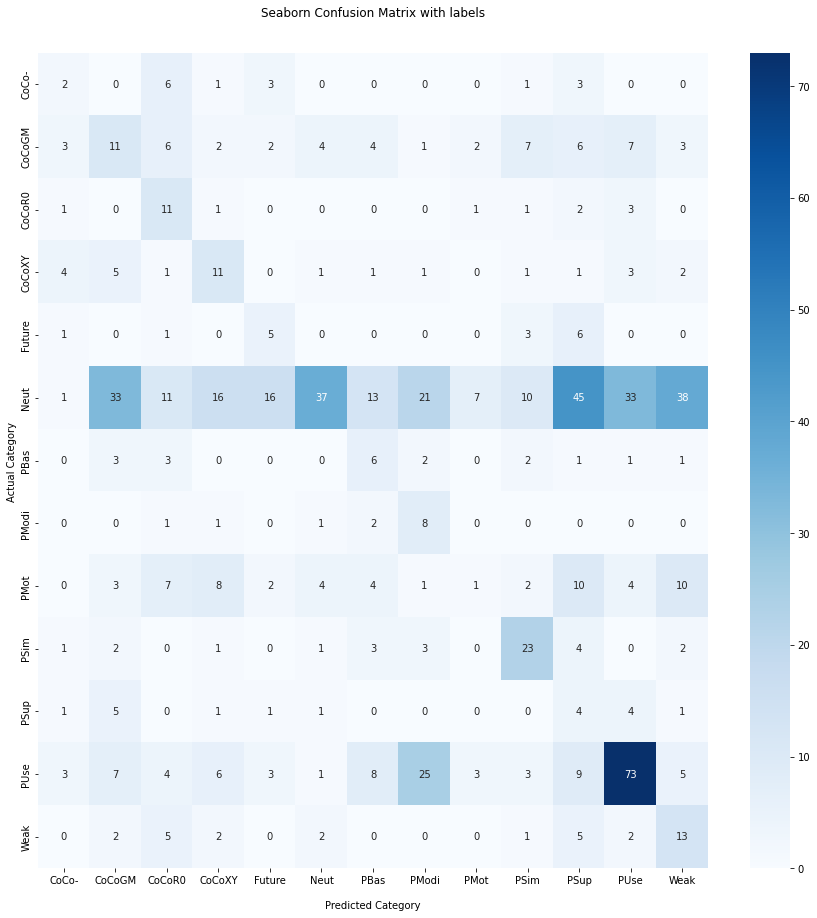

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
classifier = CitationClassifier3(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

print(classifier)

CitationClassifier3(
  (elmo): Elmo(
    (_elmo_lstm): _ElmoBiLm(
      (_token_embedder): _ElmoCharacterEncoder(
        (char_conv_0): Conv1d(16, 32, kernel_size=(1,), stride=(1,))
        (char_conv_1): Conv1d(16, 32, kernel_size=(2,), stride=(1,))
        (char_conv_2): Conv1d(16, 64, kernel_size=(3,), stride=(1,))
        (char_conv_3): Conv1d(16, 128, kernel_size=(4,), stride=(1,))
        (char_conv_4): Conv1d(16, 256, kernel_size=(5,), stride=(1,))
        (char_conv_5): Conv1d(16, 512, kernel_size=(6,), stride=(1,))
        (char_conv_6): Conv1d(16, 1024, kernel_size=(7,), stride=(1,))
        (_highways): Highway(
          (_layers): ModuleList(
            (0): Linear(in_features=2048, out_features=4096, bias=True)
            (1): Linear(in_features=2048, out_features=4096, bias=True)
          )
        )
        (_projection): Linear(in_features=2048, out_features=512, bias=True)
      )
      (_elmo_lstm): ElmoLstm(
        (forward_layer_0): LstmCellWithProjection(
   

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.524192314881545	 val_acc=18.885601577909274
Epoch 1	 val_loss=2.431083926787743	 val_acc=24.861932938856015
Epoch 2	 val_loss=2.4255871405968294	 val_acc=24.605522682445756
Epoch 3	 val_loss=2.3999351721543527	 val_acc=24.36883629191321
Epoch 4	 val_loss=2.372327025120075	 val_acc=27.702169625246547
Epoch 5	 val_loss=2.3946521282196045	 val_acc=25.650887573964496
Epoch 6	 val_loss=2.398673085065988	 val_acc=22.317554240631164
Epoch 7	 val_loss=2.37883827319512	 val_acc=23.63905325443787
Epoch 8	 val_loss=2.370668677183298	 val_acc=28.037475345167646
Epoch 9	 val_loss=2.3594979322873626	 val_acc=26.676528599605522
Epoch 10	 val_loss=2.35595872768989	 val_acc=30.414201183431956
Epoch 11	 val_loss=2.3401412963867196	 val_acc=31.31163708086785
Epoch 12	 val_loss=2.327530649992136	 val_acc=32.593688362919124
Epoch 13	 val_loss=2.3378112407831044	 val_acc=33.234714003944774
Epoch 14	 val_loss=2.35658008318681	 val_acc=29.753451676528602
Epoch 15	 val_loss=2.32122307557326

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([ 5,  5, 10,  5,  6,  1, 10,  5,  9,  9,  1,  8,  5,  5,  4,  5, 11,  5,
         5,  5,  8,  5,  5,  5, 11,  5], device='cuda:0')

In [ ]:
prediction.pop()

tensor([ 8,  5,  6,  1,  8,  0,  8,  8,  9,  9,  1,  4,  7,  4,  4,  5, 11, 12,
         3, 12, 10,  9,  7,  6, 11, 12], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.20      0.19      0.19        16
      CoCoGM       0.18      0.10      0.13        58
      CoCoR0       0.03      0.05      0.04        20
      CoCoXY       0.20      0.32      0.25        31
      Future       0.23      0.44      0.30        16
        Neut       0.67      0.21      0.32       281
        PBas       0.20      0.53      0.29        19
       PModi       0.05      0.15      0.08        13
        PMot       0.26      0.38      0.31        56
        PSim       0.36      0.68      0.47        40
        PSup       0.15      0.50      0.23        18
        PUse       0.66      0.63      0.64       150
        Weak       0.28      0.47      0.35        32

    accuracy                           0.35       750
   macro avg       0.27      0.36      0.28       750
weighted avg       0.48      0.35      0.36       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

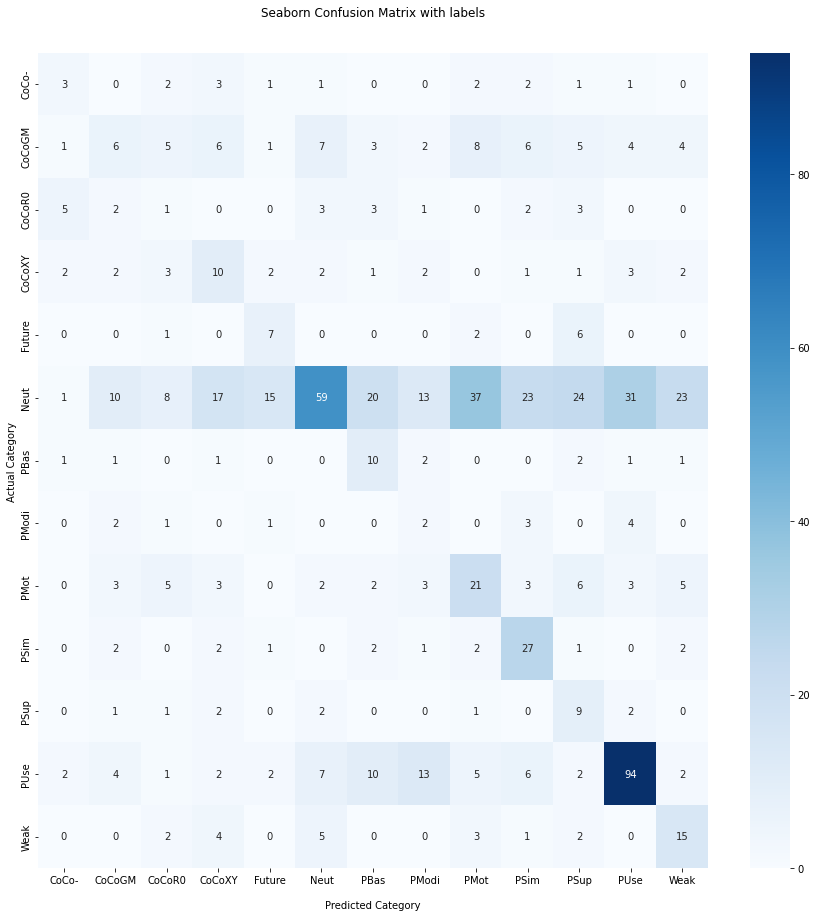

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.565193964884832	 val_acc=4.102564102564102
Epoch 1	 val_loss=2.564676532378563	 val_acc=4.358974358974359
Epoch 2	 val_loss=2.5621034548832826	 val_acc=5.384615384615384
Epoch 3	 val_loss=2.561015339998099	 val_acc=6.153846153846155
Epoch 4	 val_loss=2.554142786906316	 val_acc=6.577909270216963
Epoch 5	 val_loss=2.548263265536381	 val_acc=14.398422090729781
Epoch 6	 val_loss=2.5429984973027158	 val_acc=7.475345167652862
Epoch 7	 val_loss=2.542306707455561	 val_acc=7.0907297830374745
Epoch 8	 val_loss=2.534098194195674	 val_acc=7.731755424063117
Epoch 9	 val_loss=2.5355507410489593	 val_acc=7.712031558185405
Epoch 10	 val_loss=2.542832475442152	 val_acc=6.83431952662722
Epoch 11	 val_loss=2.530810667918279	 val_acc=7.988165680473373
Epoch 12	 val_loss=2.5343652871938844	 val_acc=7.347140039447731
Epoch 13	 val_loss=2.528868620212261	 val_acc=8.096646942800792
Epoch 14	 val_loss=2.5343487904622006	 val_acc=7.731755424063117
Epoch 15	 val_loss=2.5319197269586415	 val_a

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([ 5,  5, 10,  5,  6,  1, 10,  5,  9,  9,  1,  8,  5,  5,  4,  5, 11,  5,
         5,  5,  8,  5,  5,  5, 11,  5], device='cuda:0')

In [ ]:
prediction.pop()

tensor([12, 12,  9,  9,  9,  9, 12, 12, 12,  9, 12, 12,  9, 12,  9, 12,  9, 12,
        12, 12,  9, 12,  9,  9,  9, 12], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.00      0.00      0.00        16
      CoCoGM       0.00      0.00      0.00        58
      CoCoR0       0.00      0.00      0.00        20
      CoCoXY       0.00      0.00      0.00        31
      Future       0.00      0.00      0.00        16
        Neut       0.00      0.00      0.00       281
        PBas       0.00      0.00      0.00        19
       PModi       0.00      0.00      0.00        13
        PMot       0.03      0.02      0.02        56
        PSim       0.07      0.82      0.14        40
        PSup       0.00      0.00      0.00        18
        PUse       0.00      0.00      0.00       150
        Weak       0.10      0.81      0.18        32

    accuracy                           0.08       750
   macro avg       0.02      0.13      0.03       750
weighted avg       0.01      0.08      0.02       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

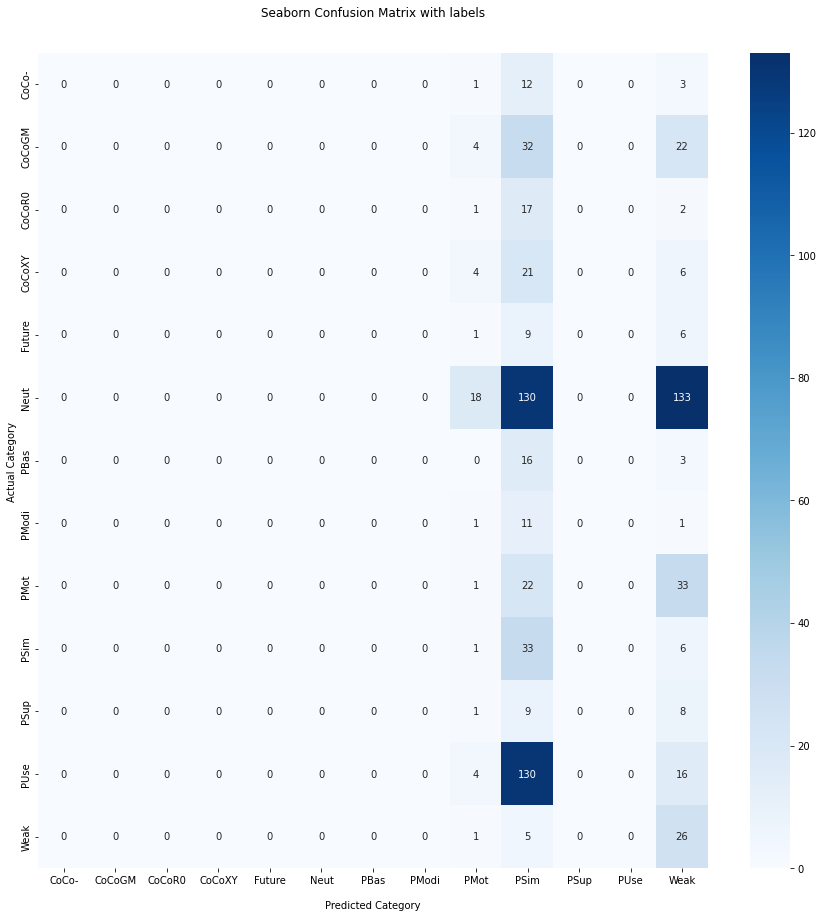

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# if you could generate a global attentive sentence vector and use that for classsification
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        return torch.sum(weighted_input, 1)

class CitationClassifier(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        # self.attention_layer = Attention(hidden_dim*2)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print(elmo_out['elmo_representations'][0].shape)
        # print("x.shape")
        # print(x.shape)
        
        packed_output, (hidden, cell) = self.lstm(x)
        l=packed_output.shape[1]
        l=torch.tensor(l)
        l=l.cuda()
        h=torch.tensor(64)
        h=h.cuda()
        self.attention_layer = Attention(h,l).cuda()
        packed_output = self.attention_layer(packed_output)
        # print(packed_output.shape)
        #packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        out = self.fc1(packed_output)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.561682233443627	 val_acc=9.289940828402369
Epoch 1	 val_loss=2.5472189646500807	 val_acc=17.603550295857985
Epoch 2	 val_loss=2.502416885816134	 val_acc=18.944773175542405
Epoch 3	 val_loss=2.48367570913755	 val_acc=20.335305719921102
Epoch 4	 val_loss=2.473909084613507	 val_acc=21.469428007889544
Epoch 5	 val_loss=2.4788550046774063	 val_acc=18.688362919132146
Epoch 6	 val_loss=2.4639490109223585	 val_acc=23.13609467455621
Epoch 7	 val_loss=2.457688276584331	 val_acc=22.879684418145956
Epoch 8	 val_loss=2.4381800339772153	 val_acc=24.05325443786982
Epoch 9	 val_loss=2.4607014014170723	 val_acc=22.47534516765286
Epoch 10	 val_loss=2.4485119214424724	 val_acc=23.264299802761347
Epoch 11	 val_loss=2.457288485306959	 val_acc=18.431952662721894
Epoch 12	 val_loss=2.4547714911974396	 val_acc=19.30966469428008
Epoch 13	 val_loss=2.441355118384728	 val_acc=21.489151873767252
Epoch 14	 val_loss=2.4423801165360675	 val_acc=20.3353057199211
Epoch 15	 val_loss=2.43340816864600

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([ 5,  5, 10,  5,  6,  1, 10,  5,  9,  9,  1,  8,  5,  5,  4,  5, 11,  5,
         5,  5,  8,  5,  5,  5, 11,  5], device='cuda:0')

In [ ]:
prediction.pop()

tensor([ 8,  3,  6,  2,  0,  2, 10,  8, 10, 10,  4, 11,  7, 12,  6, 12, 11,  8,
         8, 12,  8, 10,  0, 11, 11,  3], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.09      0.19      0.12        16
      CoCoGM       0.00      0.00      0.00        58
      CoCoR0       0.09      0.15      0.11        20
      CoCoXY       0.19      0.35      0.24        31
      Future       0.18      0.56      0.28        16
        Neut       0.00      0.00      0.00       281
        PBas       0.10      0.37      0.16        19
       PModi       0.00      0.00      0.00        13
        PMot       0.19      0.41      0.26        56
        PSim       0.00      0.00      0.00        40
        PSup       0.03      0.17      0.05        18
        PUse       0.54      0.68      0.60       150
        Weak       0.11      0.31      0.16        32

    accuracy                           0.23       750
   macro avg       0.12      0.25      0.15       750
weighted avg       0.15      0.23      0.17       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

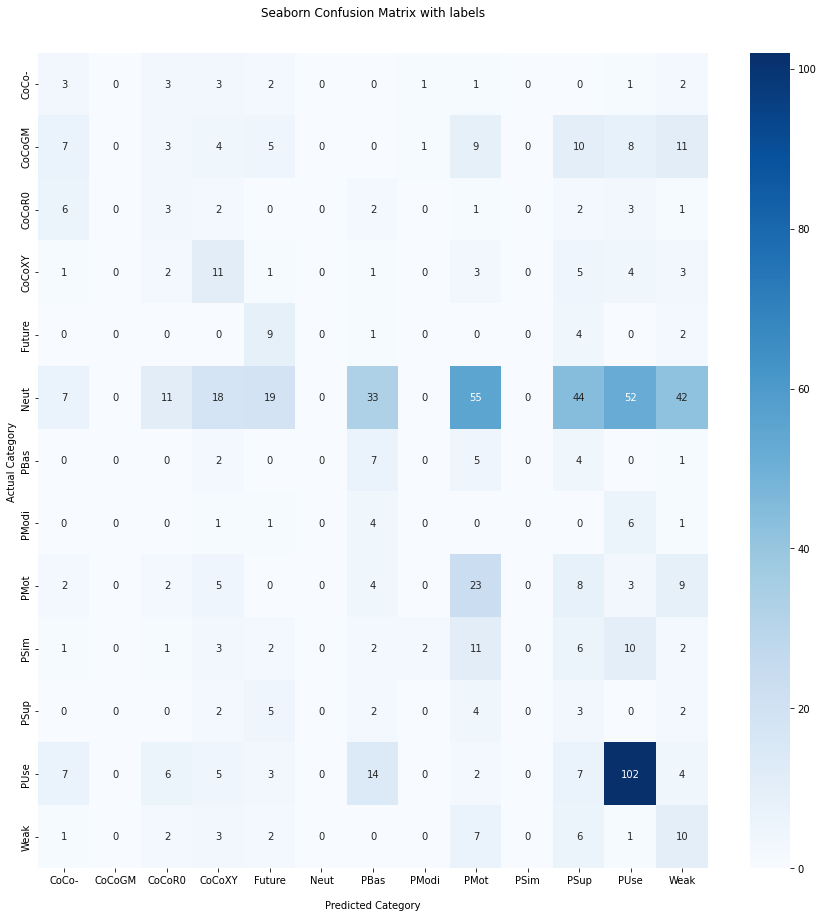

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#whether you can replace the sentence vector with max pooling of the sentence (as the sentence vector)
# bilstm output of citseg
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class CitationClassifier1(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier1, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print("x.shape")
        # print(x.shape)
        packed_output, (hidden, cell) = self.lstm(x)
        #packed_output=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        packed_output=torch.max(packed_output, 1)
        out = self.fc1(packed_output)
        out = self.relu(out)
        out = self.fc2(out)
        pred1= self.act(out)
        return pred1

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.5544802133853626	 val_acc=17.988165680473372
Epoch 1	 val_loss=2.5084503430586587	 val_acc=19.930966469428007
Epoch 2	 val_loss=2.506862108524029	 val_acc=12.968441814595659
Epoch 3	 val_loss=2.5019423869939956	 val_acc=11.923076923076922
Epoch 4	 val_loss=2.493902426499587	 val_acc=12.968441814595659
Epoch 5	 val_loss=2.4749213640506458	 val_acc=17.199211045364898
Epoch 6	 val_loss=2.5239116962139425	 val_acc=7.455621301775149
Epoch 7	 val_loss=2.4809914093751164	 val_acc=12.19921104536489
Epoch 8	 val_loss=2.4621860247391916	 val_acc=16.301775147928996
Epoch 9	 val_loss=2.471639385590186	 val_acc=15.552268244575938
Epoch 10	 val_loss=2.4555416198877187	 val_acc=16.360946745562128
Epoch 11	 val_loss=2.4441374081831713	 val_acc=19.013806706114398
Epoch 12	 val_loss=2.444348096847534	 val_acc=18.500986193293887
Epoch 13	 val_loss=2.4346348505753737	 val_acc=19.05325443786982
Epoch 14	 val_loss=2.423817130235525	 val_acc=21.489151873767256
Epoch 15	 val_loss=2.4183601

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([ 5,  5, 10,  5,  6,  1, 10,  5,  9,  9,  1,  8,  5,  5,  4,  5, 11,  5,
         5,  5,  8,  5,  5,  5, 11,  5], device='cuda:0')

In [ ]:
prediction.pop()

tensor([ 4,  9, 11,  9,  3, 11,  4,  1,  9,  9,  1,  4,  7, 12, 11, 12,  7, 12,
         8,  8,  4,  4,  7,  7, 11, 12], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.00      0.00      0.00        16
      CoCoGM       0.23      0.28      0.25        58
      CoCoR0       0.16      0.35      0.22        20
      CoCoXY       0.15      0.26      0.19        31
      Future       0.13      0.62      0.22        16
        Neut       0.00      0.00      0.00       281
        PBas       0.00      0.00      0.00        19
       PModi       0.08      0.54      0.14        13
        PMot       0.16      0.18      0.17        56
        PSim       0.20      0.50      0.29        40
        PSup       0.06      0.06      0.06        18
        PUse       0.54      0.50      0.52       150
        Weak       0.21      0.56      0.30        32

    accuracy                           0.23       750
   macro avg       0.15      0.30      0.18       750
weighted avg       0.17      0.23      0.19       750



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

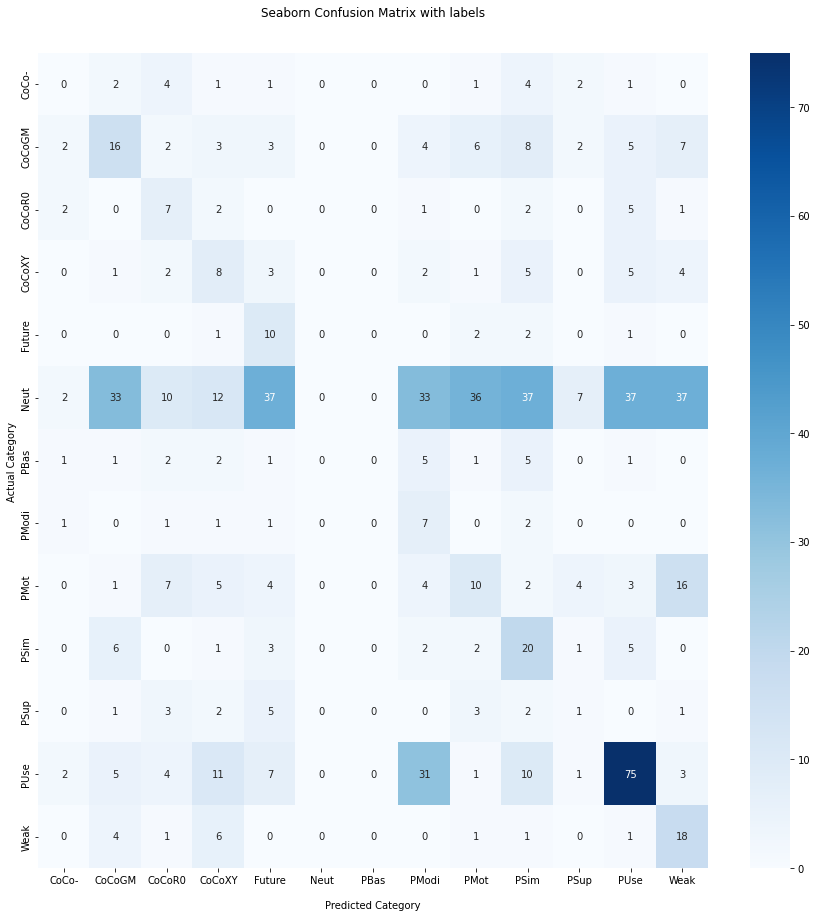

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# if you could append a global attentive sentence vector to citeseg and send the new feature vector for classsification
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import os
import numpy as np
from allennlp.modules.elmo import Elmo

class Attention(nn.Module):
    def __init__(self, feature_dim, step_dim, bias=True, **kwargs):
        super(Attention, self).__init__(**kwargs)
        
        self.supports_masking = True

        self.bias = bias
        self.feature_dim = feature_dim
        self.step_dim = step_dim
        self.features_dim = 0
        
        weight = torch.zeros(feature_dim, 1)
        nn.init.kaiming_uniform_(weight)
        self.weight = nn.Parameter(weight)
        
        if bias:
            self.b = nn.Parameter(torch.zeros(step_dim))
        
    def forward(self, x, mask=None):
        # print("x.shape")
        # print(x.shape)
        feature_dim = self.feature_dim 
        # print(feature_dim)
        step_dim = self.step_dim
        # print(step_dim)

        eij = torch.mm(x.contiguous().view(-1, feature_dim), self.weight).view(-1, step_dim)
        # print("eij.shape")
        # print(eij.shape)
        
        if self.bias:
            eij = eij + self.b
            
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        
        if mask is not None:
            a = a * mask

        a = a / (torch.sum(a, 1, keepdim=True) + 1e-10)

        weighted_input = x * torch.unsqueeze(a, -1)
        return torch.sum(weighted_input, 1)

class CitationClassifier(nn.Module):
    def __init__(self,hidden_dim,num_layers, label_size,dropout=0.5):
        super(CitationClassifier, self).__init__()
        self.dropout = dropout
        self.hidden_dim = hidden_dim
        options_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_options.json"
        weight_file = "https://s3-us-west-2.amazonaws.com/allennlp/models/elmo/2x4096_512_2048cnn_2xhighway/elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5"
        self.elmo = Elmo(options_file, weight_file, 1, dropout=dropout, do_layer_norm=False)
        # elmo output
#         Dict with keys:
#         ``'elmo_representations'``: ``List[torch.Tensor]``
#             A ``num_output_representations`` list of ELMo representations for the input sequence.
#             Each representation is shape ``(batch_size, timesteps, embedding_dim)``
#         ``'mask'``:  ``torch.Tensor``
#             Shape ``(batch_size, timesteps)`` long tensor with sequence mask.
        self.lstm = nn.LSTM(1024, hidden_dim,num_layers, bidirectional=True, batch_first=True)
        # self.attention_layer = Attention(hidden_dim*2)
        self.fc1 = nn.Linear(hidden_dim*2*2, 120)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(120, label_size)
        self.act=nn.Softmax()

    def init_weights(self):
        for name, param in self.hidden2label.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        for name, param in self.conv1.named_parameters():
            if 'bias' in name:
                nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                nn.init.xavier_uniform_(param)
        
    def forward(self, sentences,citseg_id):
        # print("sentences.shape")
        # print(sentences.shape)
        elmo_out = self.elmo(sentences)
        x = elmo_out['elmo_representations'][0]
        # print(elmo_out['elmo_representations'][0].shape)
        # print("x.shape")
        # print(x.shape)
        
        packed_output, (hidden, cell) = self.lstm(x)
        l=packed_output.shape[1]
        l=torch.tensor(l)
        l=l.cuda()
        h=torch.tensor(64)
        h=h.cuda()
        self.attention_layer = Attention(h,l).cuda()
        packed_output1 = self.attention_layer(packed_output)
        # print(packed_output.shape)
        packed_output2=packed_output[torch.arange(packed_output.size(0)),citseg_id.long()]
        # print(packed_output.shape)
        att_citeseg=torch.cat([packed_output1,packed_output2],dim=1)
        out = self.fc1(att_citeseg)
        # print(out.shape)
        out = self.relu(out)
        # print(out.shape)
        out = self.fc2(out)
        # print(out.shape)
        pred1= self.act(out)
        # print(pred1.shape)
        return pred1

In [ ]:
classifier = CitationClassifier(hidden_dim=args.hidden_dim,num_layers=args.num_layers,label_size=len(vectorizer.category_vocab))

In [ ]:
predictions=[]
prediction=[]
y=[]
classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
    
loss_func = nn.CrossEntropyLoss(dataset.class_weights)
optimizer = optim.RMSprop(classifier.parameters(), lr=args.learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                           mode='min', factor=0.5,
                                           patience=1)

train_state = make_train_state(args)

epoch_bar = tqdm_notebook(desc='training routine', 
                          total=args.num_epochs,
                          position=0)

dataset.set_split('train')
train_bar = tqdm_notebook(desc='split=train',
                          total=dataset.get_num_batches(args.batch_size), 
                          position=1, 
                          leave=True)
dataset.set_split('val')
val_bar = tqdm_notebook(desc='split=val',
                        total=dataset.get_num_batches(args.batch_size), 
                        position=1, 
                        leave=True)

try:
    for epoch_index in range(args.num_epochs):
        train_state['epoch_index'] = epoch_index

        # Iterate over training dataset

        # setup: batch generator, set loss and acc to 0, set train mode on

        dataset.set_split('train')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.0
        running_acc = 0.0
        classifier.train()

        for batch_index, batch_dict in enumerate(batch_generator):
            # the training routine is these 5 steps:

            # --------------------------------------
            # step 1. zero the gradients
            optimizer.zero_grad()

            # step 2. compute the output
            y_pred = classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # step 4. use loss to produce gradients
            loss.backward()

            # step 5. use optimizer to take gradient step
            optimizer.step()
            # -----------------------------------------
            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

            # update bar
            train_bar.set_postfix(loss=running_loss, acc=running_acc, 
                                  epoch=epoch_index)
            train_bar.update()

        train_state['train_loss'].append(running_loss)
        train_state['train_acc'].append(running_acc)

        # Iterate over val dataset

        # setup: batch generator, set loss and acc to 0; set eval mode on
        dataset.set_split('val')
        batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
        running_loss = 0.
        running_acc = 0.
        classifier.eval()

        for batch_index, batch_dict in enumerate(batch_generator):

            # compute the output
            y_pred =  classifier(batch_dict[0],batch_dict[2])

            # step 3. compute the loss
            loss = loss_func(y_pred, batch_dict[1])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            _, predictions = y_pred.max(dim=1)
            prediction.append(predictions)
            y.append(batch_dict[1])

            # compute the accuracy
            acc_t = compute_accuracy(y_pred, batch_dict[1])
            
            running_acc += (acc_t - running_acc) / (batch_index + 1)
            val_bar.set_postfix(loss=running_loss, acc=running_acc, 
                            epoch=epoch_index)
            val_bar.update()
        print('Epoch {}\t val_loss={}\t val_acc={}'.format(epoch_index, running_loss, running_acc))

        train_state['val_loss'].append(running_loss)
        train_state['val_acc'].append(running_acc)
        # print("Test loss: {};".format(train_state['val_loss']))
        # print("Test Accuracy: {}".format(train_state['val_acc']))

        train_state = update_train_state(args=args, model=classifier,
                                         train_state=train_state)

        scheduler.step(train_state['val_loss'][-1])

        if train_state['stop_early']:
            break

        train_bar.n = 0
        val_bar.n = 0
        epoch_bar.update()
except KeyboardInterrupt:
    print("Exiting loop")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


training routine:   0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=train:   0%|          | 0/83 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


split=val:   0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0	 val_loss=2.5391805171966557	 val_acc=18.757396449704146
Epoch 1	 val_loss=2.484011833484356	 val_acc=22.00197238658777
Epoch 2	 val_loss=2.444507690576406	 val_acc=25.207100591715975
Epoch 3	 val_loss=2.4221394520539503	 val_acc=24.881656804733733
Epoch 4	 val_loss=2.3959791293511024	 val_acc=25.335305719921106
Epoch 5	 val_loss=2.386387788332426	 val_acc=25.374753451676526
Epoch 6	 val_loss=2.3788042618678165	 val_acc=26.104536489151872
Epoch 7	 val_loss=2.367814293274513	 val_acc=26.765285996055223
Epoch 8	 val_loss=2.371080866226783	 val_acc=23.964497041420124
Epoch 9	 val_loss=2.3419913649559017	 val_acc=28.30374753451677
Epoch 10	 val_loss=2.3496163808382478	 val_acc=26.27218934911242
Epoch 11	 val_loss=2.356147821132953	 val_acc=26.40039447731755
Epoch 12	 val_loss=2.3240889219137344	 val_acc=27.278106508875734
Epoch 13	 val_loss=2.3204183670190672	 val_acc=28.83629191321499
Epoch 14	 val_loss=2.316579626156734	 val_acc=28.451676528599602
Epoch 15	 val_loss=2.31370053841

In [ ]:
# compute the loss & accuracy on the test set using the best available model

classifier.load_state_dict(torch.load(train_state['model_filename']))

classifier = classifier.to(args.device)
dataset.class_weights = dataset.class_weights.to(args.device)
loss_func = nn.CrossEntropyLoss(dataset.class_weights)

dataset.set_split('val')
batch_generator = batchify(dataset,bsz=args.batch_size,device=args.device)
running_loss = 0.
running_acc = 0.
classifier.eval()
predictions=[]
prediction=[]
y=[]

for batch_index, batch_dict in enumerate(batch_generator):
    # compute the output
    y_pred =  classifier(batch_dict[0],batch_dict[2])

    
    # compute the loss
    loss = loss_func(y_pred, batch_dict[1])
    loss_t = loss.item()
    running_loss += (loss_t - running_loss) / (batch_index + 1)
    _, predictions = y_pred.max(dim=1)
    prediction.append(predictions)
    y.append(batch_dict[1])
    # compute the accuracy
    acc_t = compute_accuracy(y_pred, batch_dict[1])
    running_acc += (acc_t - running_acc) / (batch_index + 1)

train_state['test_loss'] = running_loss
train_state['test_acc'] = running_acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
y.pop()

tensor([ 5,  5, 10,  5,  6,  1, 10,  5,  9,  9,  1,  8,  5,  5,  4,  5, 11,  5,
         5,  5,  8,  5,  5,  5, 11,  5], device='cuda:0')

In [ ]:
prediction.pop()

tensor([ 8,  5, 11,  1,  6,  0,  5,  8,  1,  9,  1, 11,  7,  6,  6,  5, 11, 12,
         8,  3, 10,  1,  6,  6, 11,  2], device='cuda:0')

In [ ]:
y_tensor = torch.stack(y)
pred_tensor = torch.stack(prediction)

In [ ]:
true_y=y_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_tensor.cpu().detach().numpy()

In [ ]:
pred_y=pred_y.flatten()

In [ ]:
true_y=true_y.flatten()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"]
#target_names = ["Future","Neut","PSim","compare_contrast","support"]
print(classification_report(true_y, pred_y, target_names=target_names))

              precision    recall  f1-score   support

       CoCo-       0.40      0.25      0.31        16
      CoCoGM       0.34      0.22      0.27        58
      CoCoR0       0.11      0.20      0.14        20
      CoCoXY       0.20      0.35      0.25        31
      Future       0.26      0.56      0.36        16
        Neut       0.70      0.17      0.27       281
        PBas       0.11      0.37      0.16        19
       PModi       0.14      0.38      0.21        13
        PMot       0.30      0.50      0.37        56
        PSim       0.39      0.65      0.49        40
        PSup       0.14      0.22      0.17        18
        PUse       0.62      0.62      0.62       150
        Weak       0.29      0.62      0.40        32

    accuracy                           0.36       750
   macro avg       0.31      0.39      0.31       750
weighted avg       0.50      0.36      0.36       750



In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(true_y, pred_y)

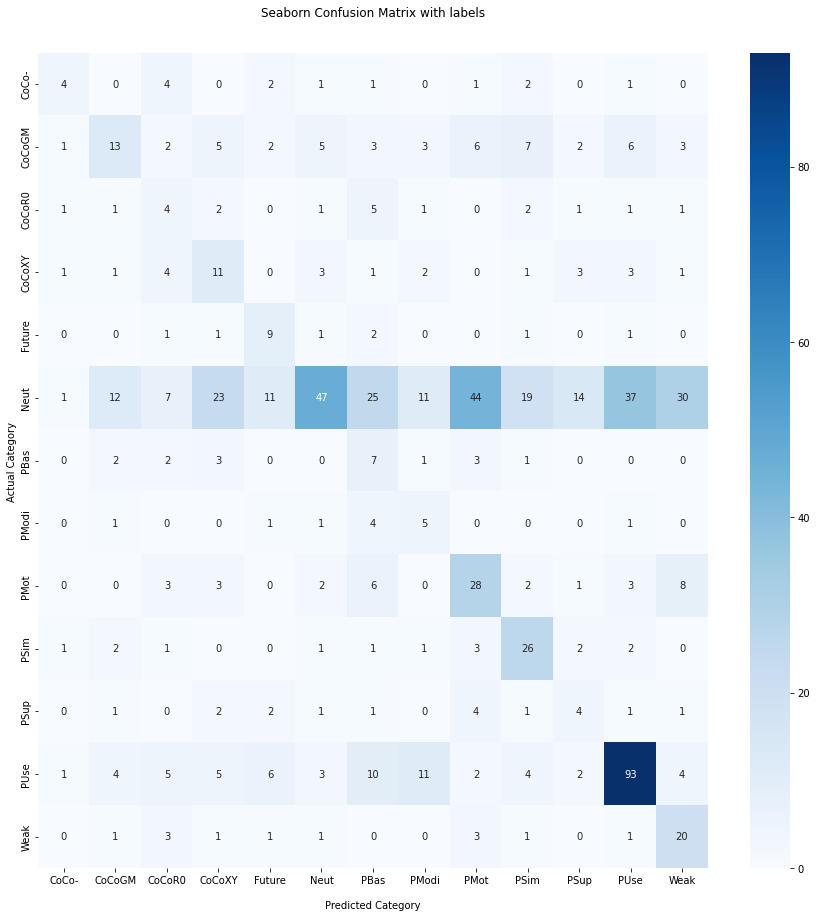

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])
ax.yaxis.set_ticklabels(["CoCo-", "CoCoGM", "CoCoR0", "CoCoXY", "Future", "Neut", "PBas", "PModi", "PMot", "PSim", "PSup", "PUse", "Weak"])

## Display the visualization of the Confusion Matrix.
plt.show()